In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import os

In [2]:
save_path = ('figures/1b3')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
epochs = 300
batch_size = 8
num_neurons = 50
seed = 10

l_r = 0.001

In [4]:
histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

In [6]:
# Shuffle
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

In [7]:
# Normalize
# X ~ N(0,1)
X_data = ((X_data - np.mean(X_data, axis = 0))/ np.std(X_data, axis =0))
print(X_data[1])

[0.3658602  0.26229304 0.79882862 0.59665321 0.61012728 0.13612981
 0.90911166]


In [8]:
trainY = Y_data[:280]
testY = Y_data[280:]

In [9]:
# Number of input feature = 6
# remove input found from precious experiment
# input number 4, index number 3
X_d=[]
for i in range(len(X_data)):
    x_d = np.delete(X_data[i],np.array(3))
    X_d.append(x_d)

    x6_data = np.array(X_d)

In [10]:
# Number of input feature = 5
# remove input found from precious experiment
# input number 2, index number 1
X_d=[]
for i in range(len(x6_data)):
    x_d = np.delete(x6_data[i],np.array(1))
    X_d.append(x_d)

    x5_data = np.array(X_d)
    print(x5_data)

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852 

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

 [-0.15773222 -0.95202863 -0.50426044 -0.16610104  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.9

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.50679383  0.79882862  1.16732114  0.6734291   0.90911166]
 [-2.07757108 -0.95202863  0.61012728 -1.34144323  0.90911166]
 [ 0.2785948  -0.07660001  0.61012728 -0.26684465  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-2.07757108 -0.95202863  0.61012728 -1.34144323  0.90911166]
 [ 0.2785948  -0.07660001  0.61012728 -0.26684465  0.90911166]
 [ 0.62765641  0.79882862 -0.50426044  0.6902197   0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 0.2785948  -0.07660001  0.61012728 

In [11]:
trainX = x5_data[:280]

testX = x5_data[280:]

In [12]:
print(testX[:2])

[[ 0.97671802  1.67425725  1.724515    1.51295924  0.90911166]
 [ 0.3658602   0.79882862  1.724515    0.87491633 -1.09997489]]


Epoch 1/300
35/35 - 0s - loss: 0.1596 - mse: 0.1596 - val_loss: 0.0649 - val_mse: 0.0649
Epoch 2/300
35/35 - 0s - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 3/300
35/35 - 0s - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 4/300
35/35 - 0s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 5/300
35/35 - 0s - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 6/300
35/35 - 0s - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 7/300
35/35 - 0s - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 8/300
35/35 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 9/300
35/35 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 10/300
35/35 - 0s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 11/300
35/35 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 12/300
35/35 

Epoch 93/300
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 94/300
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 95/300
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 96/300
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 97/300
35/35 - 0s - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 98/300
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 99/300
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 100/300
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 101/300
35/35 - 0s - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 102/300
35/35 - 0s - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 103/300
35/35 - 0s - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 

Epoch 184/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 185/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 186/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 187/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 188/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 189/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 190/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 191/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 192/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 193/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 194/300
35/35 - 0s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0038 - val_mse: 0.0038

Epoch 275/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 276/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 277/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 278/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 279/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 280/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 281/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 282/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 283/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 284/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 285/300
35/35 - 0s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0039 - val_mse: 0.0039

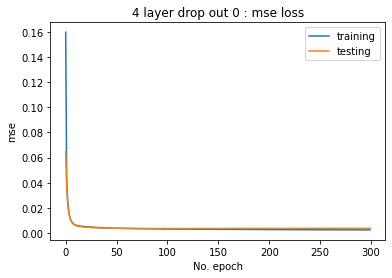

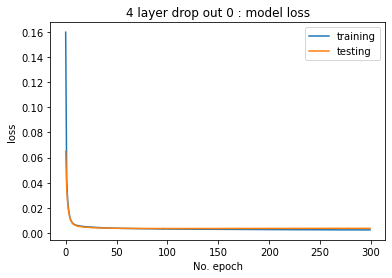

train m.s.e. = 0.003, test m.s.e. = 0.004
Epoch 1/300
35/35 - 0s - loss: 0.9906 - mse: 0.9906 - val_loss: 0.1290 - val_mse: 0.1290
Epoch 2/300
35/35 - 0s - loss: 0.4065 - mse: 0.4065 - val_loss: 0.0881 - val_mse: 0.0881
Epoch 3/300
35/35 - 0s - loss: 0.1675 - mse: 0.1675 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 4/300
35/35 - 0s - loss: 0.1047 - mse: 0.1047 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 5/300
35/35 - 0s - loss: 0.0719 - mse: 0.0719 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 6/300
35/35 - 0s - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 7/300
35/35 - 0s - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 8/300
35/35 - 0s - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 9/300
35/35 - 0s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 10/300
35/35 - 0s - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 11/300
35/35 - 0s - loss: 0.0294 - mse: 0.0294 - val_loss: 0.

Epoch 92/300
35/35 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 93/300
35/35 - 0s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 94/300
35/35 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 95/300
35/35 - 0s - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 96/300
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 97/300
35/35 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 98/300
35/35 - 0s - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 99/300
35/35 - 0s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 100/300
35/35 - 0s - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 101/300
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 102/300
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 1

Epoch 183/300
35/35 - 0s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 184/300
35/35 - 0s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 185/300
35/35 - 0s - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 186/300
35/35 - 0s - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 187/300
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 188/300
35/35 - 0s - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 189/300
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 190/300
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 191/300
35/35 - 0s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 192/300
35/35 - 0s - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 193/300
35/35 - 0s - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0154 - val_mse: 0.0154

Epoch 274/300
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 275/300
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 276/300
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 277/300
35/35 - 0s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 278/300
35/35 - 0s - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 279/300
35/35 - 0s - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 280/300
35/35 - 0s - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 281/300
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 282/300
35/35 - 0s - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 283/300
35/35 - 0s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 284/300
35/35 - 0s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0155 - val_mse: 0.0155

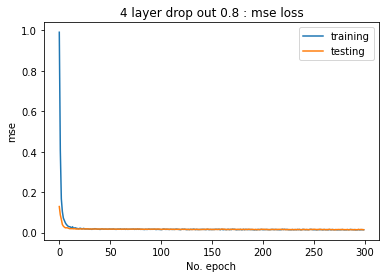

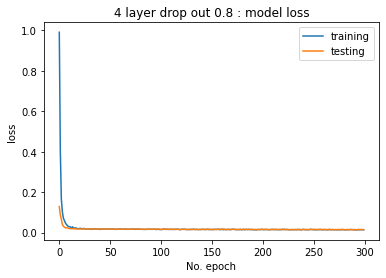

train m.s.e. = 0.014, test m.s.e. = 0.015


In [13]:
test_acc=[]
train_acc=[]
for i in (0,0.8):
    model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(rate=i),
    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(rate=i),
    keras.layers.Dense(1, activation = 'linear')])
    
    model.compile(optimizer='sgd',
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])
    
    histories['starter'] =model.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose = 2,
                                        validation_data=(testX,testY))
    
    plt.plot(histories['starter'].history['mse'], label='training')
    plt.plot(histories['starter'].history['val_mse'], label='testing')
    plt.ylabel('mse')
    plt.xlabel('No. epoch')
    plt.legend(loc="best")
    plt.title('4 layer drop out %s : mse loss'%(i))
    plt.savefig('./%s/4L_mse_VS_e_do_%s.png'%(save_path,i))
    plt.show()

    plt.plot(histories['starter'].history['loss'], label='training')
    plt.plot(histories['starter'].history['val_loss'], label='testing')
    plt.ylabel('loss')
    plt.xlabel('No. epoch')
    plt.title("4 layer drop out %s : model loss"%(i))
    plt.legend(loc="best")
    plt.savefig('./%s/4L_loss_vs_e_do_%s.png'%(save_path,i))
    plt.show()

    test_acc.append(histories['starter'].history['val_loss'])
    train_acc.append(histories['starter'].history['loss'])
    
    print('train m.s.e. = %3.3f, test m.s.e. = %3.3f'%(histories['starter'].history['loss'][-1], histories['starter'].history['val_loss'][-1]))
    


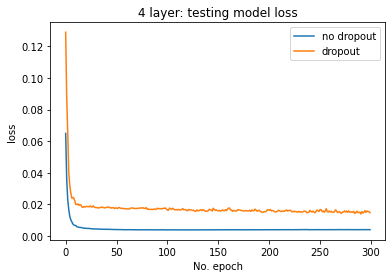

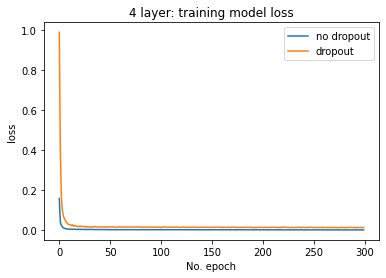

In [15]:
plt.plot(test_acc[0], label='no dropout')
plt.plot(test_acc[1], label='dropout')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.title("4 layer: testing model loss")
plt.legend(loc="best")
plt.savefig('./%s/4L_test_model_loss.png'%(save_path))
plt.show()

plt.plot(train_acc[0], label='no dropout')
plt.plot(train_acc[1], label='dropout')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.title("4 layer: training model loss")
plt.savefig('./%s/4L_training_model_loss.png'%(save_path))
plt.legend(loc="best")
plt.show()